In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme('paper', 'ticks', sns.color_palette("Paired"), font_scale=1.4)
%matplotlib inline

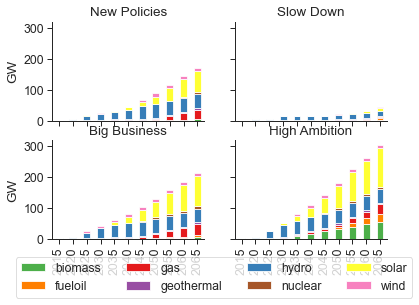

In [3]:
agg = pd.read_csv('agg_2.csv').set_index('technology')

color = {
    'gas': '#e41a1c',
    'hydro': '#377eb8',
    'biomass': '#4daf4a',
    'geothermal': '#984ea3',
    'fueloil': '#ff7f00',
    'solar': '#ffff33',
    'nuclear': '#a65628',
    'wind': '#f781bf'
}

def get_capacity_data(filename, skip=43, year_mod=5, min_year=2015, max_year=2065):
    df = pd.read_excel(filename, 
                       sheet_name='Results_Capacity',
                       skiprows=skip,
                       nrows=21)
    df = df.set_index('TECHNOLOGY')
    
    years = [x for x in range(min_year, max_year + 1) if not x % year_mod]
    technologies = df.index[df.index.str.contains('export')].to_list() \
               + ['Transmission', 'Distribution']
    shrunk = df.loc[:, years].drop(index=technologies).sort_index(ascending=True)
    return shrunk

def create_plot(filename, axes, title, skip=43, year_mod=5, legend=False):
    shrunk = get_capacity_data(filename, skip, year_mod)
    aggregate = shrunk.join(agg).groupby(by='category').sum()
    ax = aggregate.transpose().plot.bar(ax=axes, sharex=True, stacked=True, color=color, legend=legend)
    ax.set_ylabel('GW')
    ax.set_title(title)
    sns.despine()

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharey=True, sharex=True)
create_plot('data/np.xlsx', ax1, 'New Policies')
create_plot('data/sd.xlsx', ax2, 'Slow Down')
create_plot('data/bb.xlsx', ax3, 'Big Business',)
create_plot('data/ha.xlsx', ax4, 'High Ambition', skip=47)

h, l = ax4.get_legend_handles_labels()
lgd = fig.legend(h, l, ncol=4, loc='lower center', bbox_to_anchor = (0,-0.1,1,1), 
                 bbox_transform=plt.gcf().transFigure )

plt.savefig('capacity.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')

# Electricity generation

In [41]:
def supply_plot(filename, axes, title, skip=83, maxi_year=2065):
    df = pd.read_excel(filename, 
                       sheet_name='Results_Production',
                       skiprows=skip,
                       nrows=18).dropna(axis=1)
    df = df.set_index('TECHNOLOGY')
    df = df / 1e3
    
    years = [x for x in range(2015, maxi_year + 1)]
    technologies = df.index[df.index.str.contains('export')].to_list()
    shrunk = df.loc[:, years].drop(index=technologies).sort_index(ascending=True)
    
    aggregate = shrunk.join(agg).groupby(by='category').sum()
    ax = aggregate.transpose().plot.area(ax=axes, stacked=True, color=color, legend=False)
    ax.set_ylabel('TWh')
    ax.set_ylim(0,)
    ax.set_title(title)
    sns.despine()

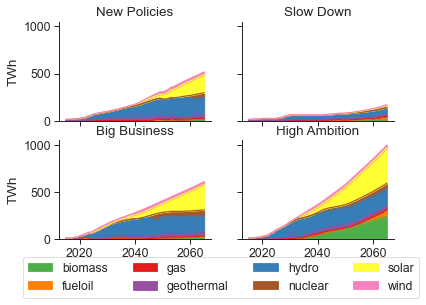

In [42]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharey=True, sharex=True)
supply_plot('data/ha.xlsx', ax4, 'High Ambition', skip=87)
supply_plot('data/np.xlsx', ax1, 'New Policies')
supply_plot('data/sd.xlsx', ax2, 'Slow Down')
supply_plot('data/bb.xlsx', ax3, 'Big Business',)


h, l = ax3.get_legend_handles_labels()
lgd = fig.legend(h, l, ncol=4, loc='lower center', bbox_to_anchor = (0,-0.1,1,1), 
                 bbox_transform=plt.gcf().transFigure )

plt.savefig('supply.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')

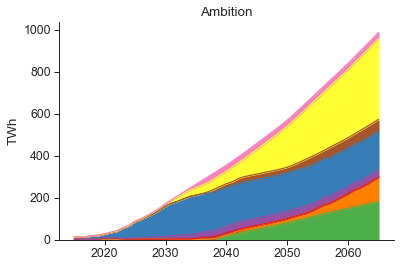

In [43]:
fig, ax = plt.subplots()
supply_plot('data/a.xlsx', ax, 'Ambition', skip=87)

# Create detailed capacity and supply plots

In [44]:
def create_plot(filename, axes, title, skip=43, year_mod=5, legend=False, max_year=2065):
    shrunk = get_capacity_data(filename, skip, year_mod, max_year=max_year)
    aggregate = shrunk.join(agg).groupby(by='category').sum()
    ax = aggregate.transpose().plot.bar(ax=axes, sharex=True, stacked=True, color=color, legend=legend)
    ax.set_ylabel('GW')
    ax.set_title(title)
    ax.set_ylim(0,)
    sns.despine()

In [48]:
def detail(filename, name, title, skip=43, skip2=83, year_mod=5, max_year=2065):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    create_plot(filename, ax1, "", skip=skip, year_mod=year_mod, legend=False, max_year=max_year)
    supply_plot(filename, ax2, "", skip2, maxi_year=max_year)

    h, l = ax1.get_legend_handles_labels()
    lgd = fig.legend(h, l, ncol=4, loc='lower center', bbox_to_anchor = (0,-0.1,1,1), 
                     bbox_transform=plt.gcf().transFigure )
    plt.tight_layout()
    plt.savefig('{}_capacity.pdf'.format(name), bbox_extra_artists=(lgd,), bbox_inches='tight')

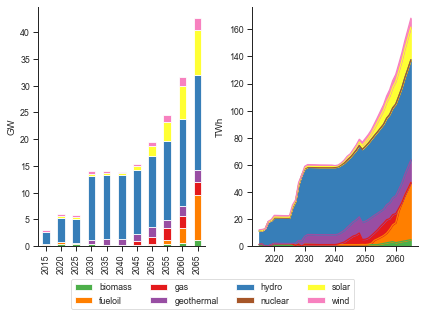

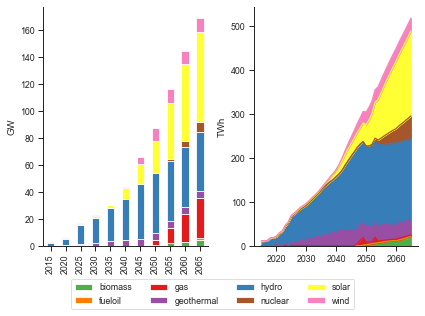

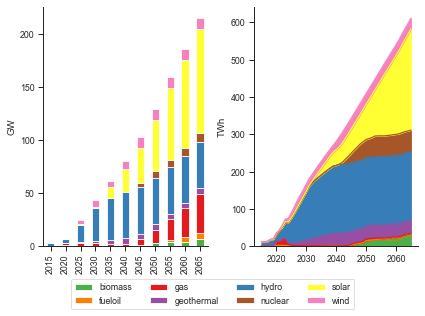

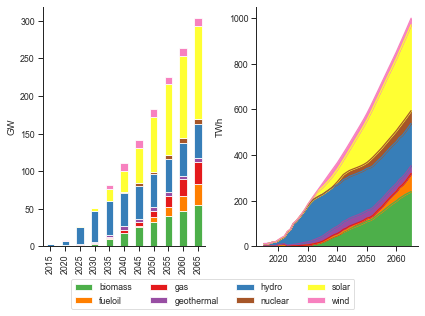

In [49]:
sns.set_theme('paper', 'ticks', sns.color_palette("Paired"), font_scale=1)
detail('data/sd.xlsx', 'sd', 'Slow Down')
detail('data/np.xlsx', 'np', 'New Policies')
detail('data/bb.xlsx', 'bb', 'Big Business')
detail('data/ha.xlsx', 'ha', 'High Ambition', skip=47, skip2=87)

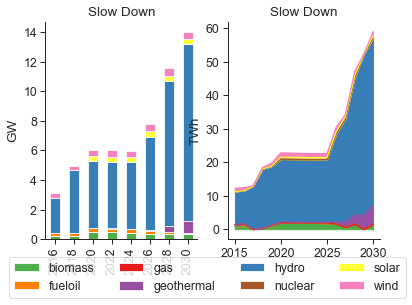

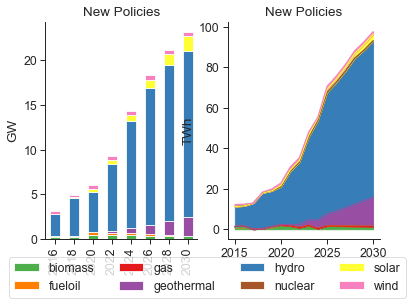

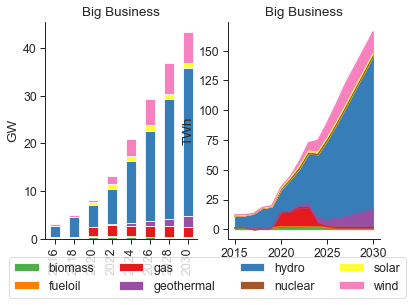

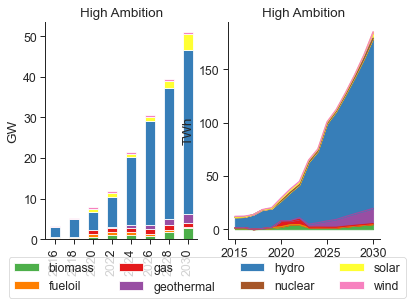

In [10]:
detail('data/sd.xlsx', 'sd', 'Slow Down', max_year=2030, year_mod=2)
detail('data/np.xlsx', 'np', 'New Policies', max_year=2030, year_mod=2)
detail('data/bb.xlsx', 'bb', 'Big Business', max_year=2030, year_mod=2)
detail('data/ha.xlsx', 'ha', 'High Ambition', skip=47, skip2=87, max_year=2030, year_mod=2)

# Key year comparison

In [11]:
sd = get_capacity_data('data/sd.xlsx', skip=43, year_mod=35, min_year=2030, max_year=2065).transpose()
bb = get_capacity_data('data/bb.xlsx', skip=43, year_mod=35, min_year=2030, max_year=2065).transpose()
ha = get_capacity_data('data/ha.xlsx', skip=47, year_mod=35, min_year=2030, max_year=2065).transpose()
np = get_capacity_data('data/np.xlsx', skip=43, year_mod=35, min_year=2030, max_year=2065).transpose()

In [12]:
sd['scenario'] = 'Slow Down'
bb['scenario'] = 'Big Business'
ha['scenario'] = 'High Ambition'
np['scenario'] = 'New Policies'

In [13]:
all_data = pd.concat([sd, np, bb, ha]).reset_index().set_index(['index', 'scenario']
                     ).sort_index(ascending=False, level=0)

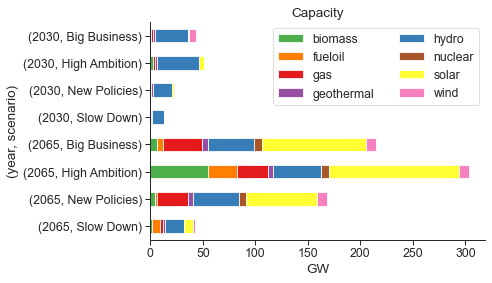

In [14]:
aggregate = all_data.groupby(by=agg.to_dict()['category'], axis=1).sum()
ax = aggregate.plot.barh(sharex=True, stacked=True, color=color, legend=False)
h, l = ax.get_legend_handles_labels()
lgd = ax.legend(h, l, ncol=2)

ax.set_xlabel('GW')
ax.set_ylabel('(year, scenario)')
ax.set_title("Capacity")
sns.despine()
plt.savefig('yearcap.png', bbox_extra_artists=(lgd,), bbox_inches='tight')

# Technology boxplot

ValueError: The number of FixedLocator locations (16), usually from a call to set_ticks, does not match the number of ticklabels (8).

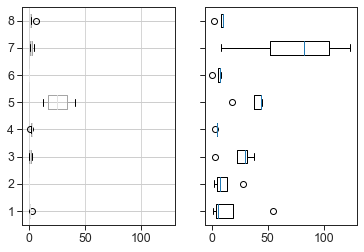

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True)

aggregate.loc[(2030), :].boxplot(ax=ax1, vert=False)
aggregate.loc[(2065), :].boxplot(ax=ax2, vert=False)
ax1.set_xlabel('GW')
ax2.set_xlabel('GW')

In [16]:
bla = aggregate.loc[(2030), :].transpose()
bla = bla.rename(columns={'New Policies': 'median'})
bla['minimum'] = bla.min(axis=1)
bla['maximum'] = bla.max(axis=1)

boo = aggregate.loc[(2065), :].transpose()
boo = boo.rename(columns={'New Policies': 'median'})
boo['minimum'] = boo.min(axis=1)
boo['maximum'] = boo.max(axis=1)

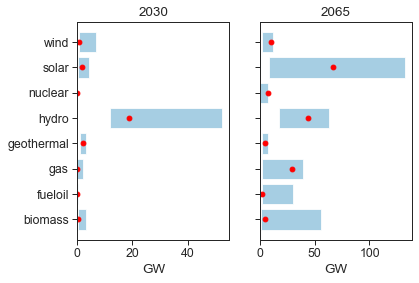

In [17]:
fig, (ax, ax2) = plt.subplots(1, 2, sharey=True)
ax.barh(left=bla['minimum'], y=bla.index, width=bla['maximum'])
ax.plot(bla['median'], bla.index, 'ro')
ax.set_xlabel('GW')
ax.set_title('2030')

ax2.barh(left=boo['minimum'], y=boo.index, width=boo['maximum'])
ax2.plot(boo['median'], boo.index, 'ro')
ax2.set_xlabel('GW')
ax2.set_title('2065')

plt.savefig('techrange.png', bbox_extra_artists=(lgd,), bbox_inches='tight')

# Total Cost Comparison

In [50]:
df = pd.read_excel('data/costs.xlsx')

In [51]:
df = df.melt(id_vars=['scenario', 'parameter'], var_name='year')

In [52]:
df

,scenario,parameter,year,value
0,Slow Down,Capital Investment,2015-2025,17.094917
1,Slow Down,Fixed Cost,2015-2025,3.200938
2,Slow Down,Variable Cost,2015-2025,0.693409
3,Slow Down,Revenues,2015-2025,-1.768318
4,Big Business,Capital Investment,2015-2025,69.837634
...,...,...,...,...
75,New Policies,Revenues,2056-2065,-34.888448
76,High Ambition,Capital Investment,2056-2065,346.482817
77,High Ambition,Fixed Cost,2056-2065,207.617372
78,High Ambition,Variable Cost,2056-2065,105.937028


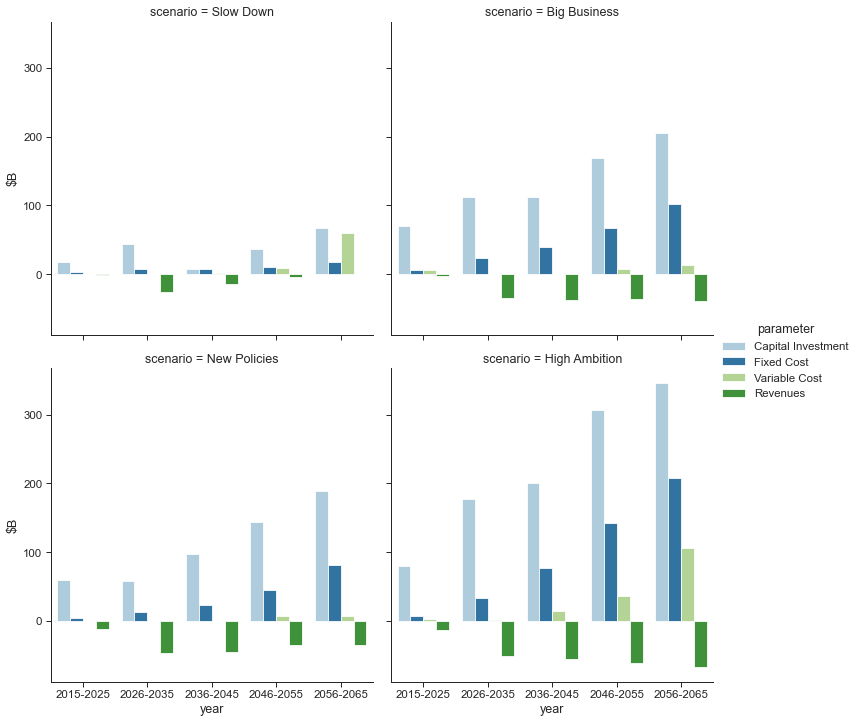

In [54]:
sns.set_theme('paper', 'ticks', sns.color_palette("Paired"), font_scale=1.3)
ax = sns.catplot(x='year', y='value', hue='parameter', col='scenario', 
                 data=df, kind='bar', col_wrap=2)
ax.set_ylabels("$B")

In [55]:
ax.savefig("costs.pdf")